## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df1=pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
df1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df1["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = df1[df1.duplicated(['Mouse ID','Timepoint'])]
# duplicatemice.groupby("Mouse ID").count()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2=df1.drop_duplicates(subset=["Mouse ID","Timepoint"])

In [6]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()
##Note: The same as non-clean Dataframe (df1) because only the duplicate mouse was dropped

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

df3=df2.groupby('Drug Regimen')['Tumour Volume (mm3)'].describe()
df_summary_per_regimen=pd.DataFrame(df3[['mean','50%']])
df_summary_per_regimen['variance']=df3['std']**2
df_summary_per_regimen['standard deviation']=df3['std']
df_summary_per_regimen['SEM']=df3['std']/df3['count']
df_summary_per_regimen.rename(columns={'50%':'median'})

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.021716
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.035215
Infubinol,52.884795,51.820584,43.128684,6.567243,0.036895
Ketapril,55.235638,53.698743,68.553577,8.279709,0.044041
Naftisol,54.331565,52.509285,66.173479,8.134708,0.043735
Placebo,54.033581,52.288934,61.168083,7.821003,0.043210
Propriva,52.393463,50.909965,43.138803,6.568014,0.042103
Ramicane,40.216745,40.673236,23.486704,4.846308,0.021256
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.042599


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
df_summary_method_aggregate=df2.groupby('Drug Regimen')['Tumour Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
df_summary_method_aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

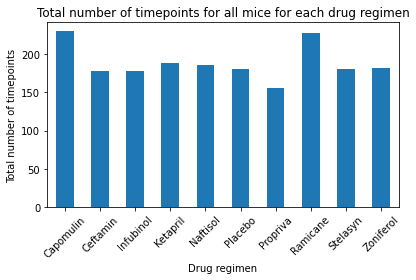

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df4=df2.groupby('Drug Regimen')['Timepoint'].count()
dfplot=df4.plot(kind="bar", title="Total number of timepoints for all mice for each drug regimen",rot=45)
dfplot.set_ylabel("Total number of timepoints")
dfplot.set_xlabel("Drug regimen")
plt.tight_layout()
plt.savefig("./figures/Bar plot timepoints vs drug regimen_Pandas.png")
plt.show()

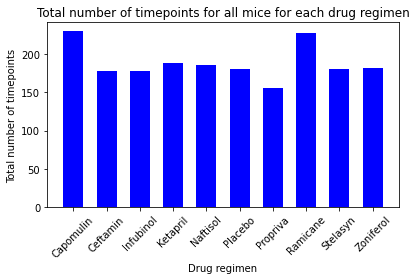

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis=df4.index
plt.bar(x_axis,df4,width=0.6,color="b", align="center")
plt.title("Total number of timepoints for all mice for each drug regimen")
plt.ylabel("Total number of timepoints")
plt.xlabel("Drug regimen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("./figures/Bar plot timepoints vs drug regimen_Pyplot.png")
plt.show()

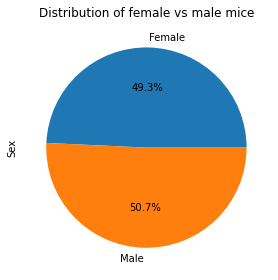

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df_sex=df2.groupby('Sex')['Sex'].count()
df_sex.plot.pie(y="Sex",title="Distribution of female vs male mice", autopct='%1.1f%%')
plt.tight_layout()
plt.savefig("./figures/PiePlot_sex distribution_Pandas.png")
plt.show()

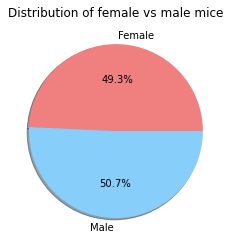

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
# The values of each section of the pie chart
sizes = df_sex
# The colours of each section of the pie chart
colours = ["lightcoral", "lightskyblue"]
explode = (0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True)
plt.title("Distribution of female vs male mice")
plt.savefig("./figures/PiePlot_sex distribution_Pyplot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

##Checked if max timepoints were different across different drug regimen: 
df5=df2.groupby('Drug Regimen')['Timepoint'].max()
df5
###Conclude: all drug regimen had the same max time points.
    
maxtimepoint=max(df2['Timepoint'])
maxtimepoint

df_filter4drugs=df2.loc[(df2['Drug Regimen']=='Capomulin')|(df2['Drug Regimen']=='Ramicane')|
                        (df2['Drug Regimen']=='Infubinol')|(df2['Drug Regimen']=='Ceftamin'),:]
df_filter4drugs_Maxtime=df_filter4drugs.loc[df_filter4drugs['Timepoint']==maxtimepoint]
df_filter4drugs_Maxtime

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=[x for x in df_filter4drugs_Maxtime['Drug Regimen']]

# Create empty list to fill with tumour vol data (for plotting)
tumour_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

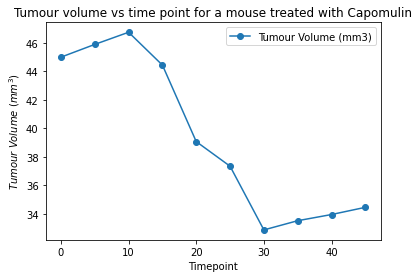

In [82]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

  #select a random mouse treated with Capomulin
random_mouse_Capomulin=df2.loc[df2['Drug Regimen']=='Capomulin'].sample(n=1)['Mouse ID']
r = random_mouse_Capomulin.astype('string').values[0]
df_for_line_plot=df2.loc[df2['Mouse ID'] == r,:]
plot1=df_for_line_plot.plot(x="Timepoint",y="Tumour Volume (mm3)", marker='o',
                      title="Tumour volume vs time point for a mouse treated with Capomulin")
plot1.set_ylabel(r'$Tumour~Volume~(mm^3)$')
plt.savefig("./figures/Line plot of tumour volume vs time point_mouse_Capomulin.png")
plt.show()

In [92]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
df_Capomulin=df2.loc[df2['Drug Regimen']=='Capomulin',['Weight (g)','Tumour Volume (mm3)']]
df_Capomulin_4plot=df_Capomulin.set_index('Weight (g)')
    # ???? what is meant by average tumour volume (within each mouse? 
    # or average tumour volume of the entire capomulin; if the later how can we have scatter tumour vol?)

,Tumour Volume (mm3)
Weight (g),
17,45.000000
17,43.878496
17,37.614948
17,38.177232
17,36.866876
...,...
24,47.685963
25,45.000000
25,45.597064


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
